In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
import cv2
import numpy as np

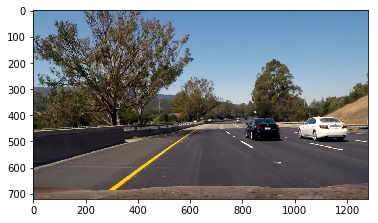

In [4]:
image = mpimg.imread('/Users/brandoncanniff/Code2020/Self-Driving-Cars/Camera Calibration/CarND-Camera-Calibration/colorspace_test_images/test6.jpg')
plt.imshow(image)

In [48]:
def hls_select(img, thresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    S = hls[:,:,2]
    sbinary = np.zeros_like(S)
    sbinary[(thresh[0] < S) & (thresh[1] >= S)] = 1
    return sbinary

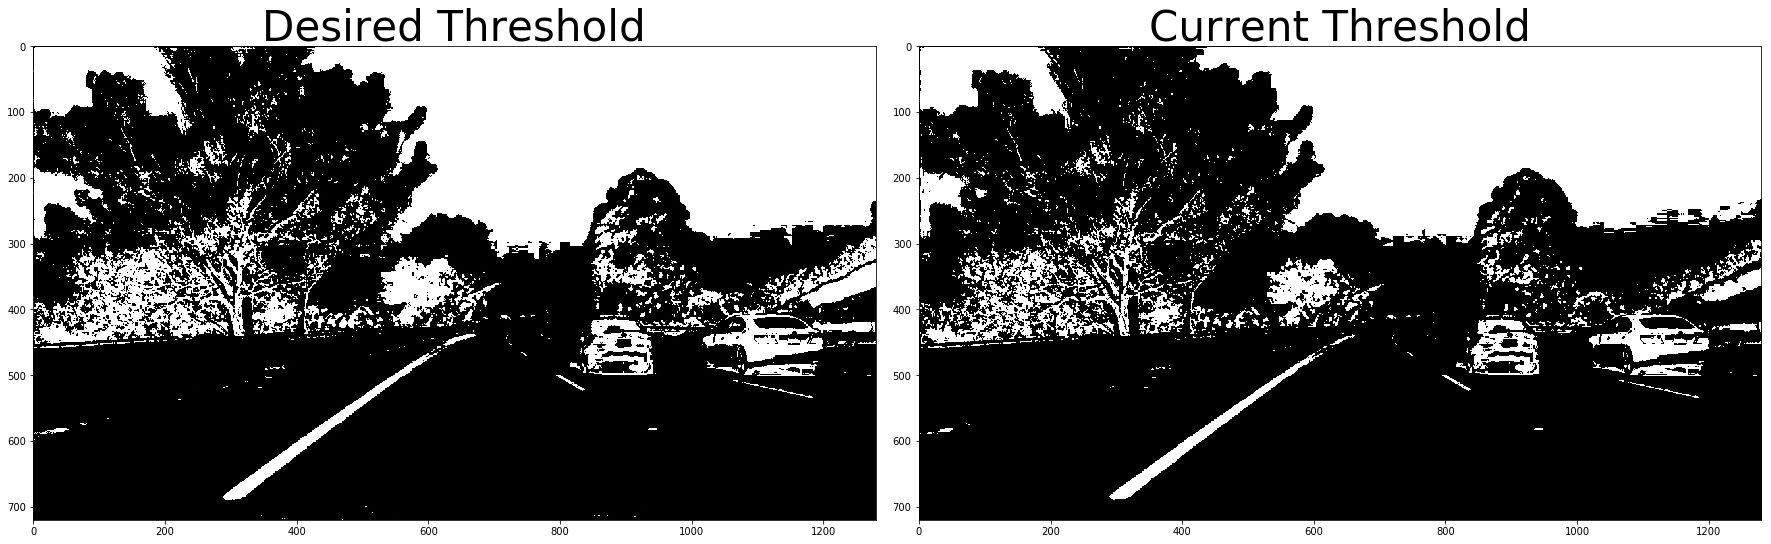

In [49]:
solution_img = mpimg.imread('/Users/brandoncanniff/Code2020/Self-Driving-Cars/Camera Calibration/CarND-Camera-Calibration/hls-binary.jpg')
s_img = hls_select(image, thresh=(90, 255))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,9))
f.tight_layout()
ax1.imshow(solution_img, cmap='gray')
ax1.set_title('Desired Threshold', fontsize=42)
ax2.imshow(s_img, cmap='gray')
ax2.set_title('Current Threshold', fontsize=42)
plt.subplots_adjust(left=0, right=1, top=0.9, bottom=0)

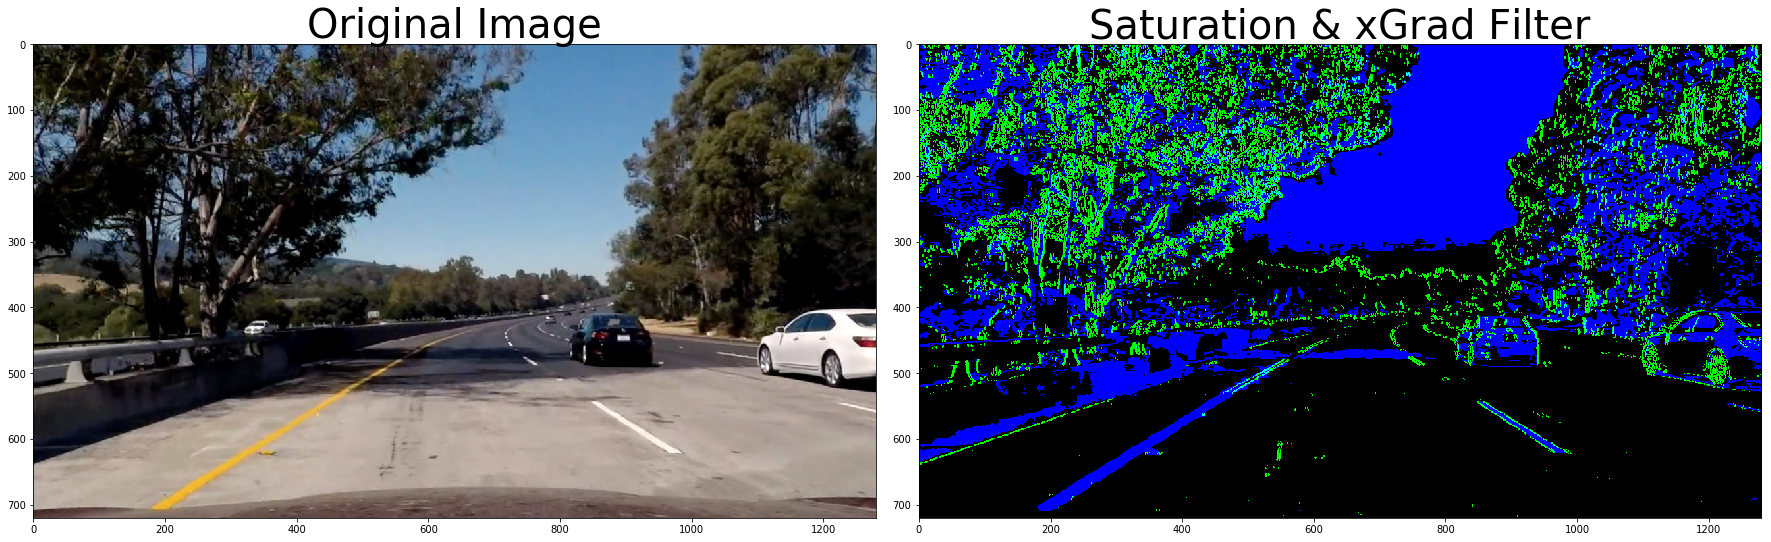

In [55]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image = mpimg.imread('/Users/brandoncanniff/Code2020/Self-Driving-Cars/Camera Calibration/CarND-Camera-Calibration/bridge_shadow.jpg')

# Edit this function to create your own pipeline.
def s_sx_filter(img, s_thresh=(90, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    return color_binary
    
result = s_sx_filter(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Saturation & xGrad Filter', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)